In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [15]:
data = pd.read_csv('dataset/SAT_and_GPA_with_Attandence.csv')

data['Attendance_Map'] = data['Attendance'].map({'Yes':1, 'No':0})

data.head()

,SAT,GPA,Attendance,Attendance_Map
0,1714,2.40,No,0
1,1664,2.52,No,0
2,1760,2.54,No,0
3,1685,2.74,No,0
4,1693,2.83,No,0


# discovery

In [16]:
data.describe()
# 46% of students not attending %75 of lessons. not bad

,SAT,GPA,Attendance_Map
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


### visualization

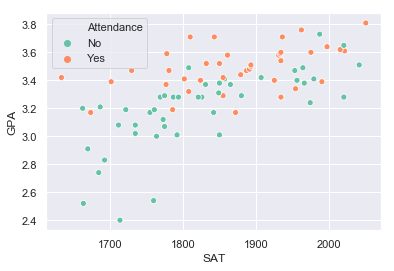

In [17]:
ax = sns.scatterplot(x='SAT', y='GPA', hue='Attendance', palette='Set2', data=data)
# w/ Attendance, there may be an opportunity for better regression.

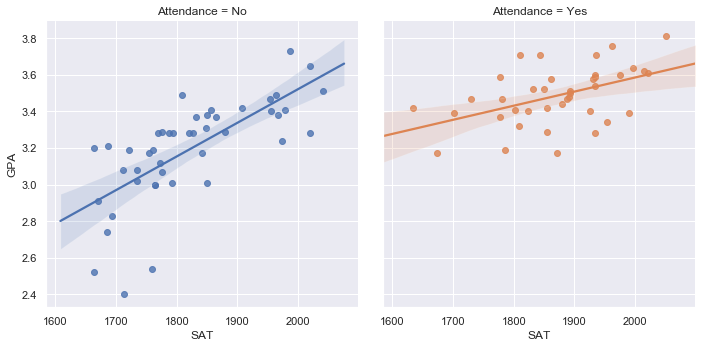

In [24]:
# sns.regplot(x="SAT", y="GPA", data=data);
sns.lmplot(x="SAT", y="GPA", col='Attendance', data=data, hue='Attendance');


# regression

In [18]:
# we need OLS w/ constant **for lineer regression**
y = data['GPA']
x = data[['SAT', 'Attendance_Map']]

x.shape, y.shape

((84, 2), (84,))

### standardization - _feature scaling_

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

scaler.fit(x)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
x_scaled = scaler.transform(x)

x_scaled[0:3]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-1.26338288, -0.93094934],
       [-1.74458431, -0.93094934],
       [-0.82067757, -0.93094934]])

### regression

In [22]:
# do regression w/ default settings, copy_X, fit_intercept, n_jobs, normalize

reg = LinearRegression()

reg.fit(x_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
# get regression results

summary = pd.DataFrame(data=[['Bias', reg.intercept_], 
                             ['SAT', reg.coef_[0]], 
                             ['Attendance', reg.coef_[1]]
                            ],
                      columns=['Features', 'Weights'])

summary

# print('r-squared:', reg.score(x_scaled, y),
#       '\nadjusted r-squared:', 1- (1-reg.score(x_scaled, y)) * (x_scaled.shape[0]-1) / (x_scaled.shape[0]-x_scaled.shape[1]-1))


,Features,Weights
0,Bias,3.330238
1,SAT,0.145449
2,Attendance,0.111038


# validations

In [33]:
#  alice w/ 1700 sat but no attendance, 
#  arthur w/ 1670 sat and w/ attandence of %75 of lessons
# test_data = pd.DataFrame({'SAT':[1700,1670], 'Attendance_Map':[0,1]})

test_data = pd.DataFrame(data=[[2400,1],
                               [1700,0],
                               [1670,1]], 
                         columns=['SAT', 'Attendance_Map'])

test_data

,SAT,Attendance_Map
0,2400,1
1,1700,0
2,1670,1


In [34]:
test_data['predicted_GPA'] = reg.predict(scaler.transform(test_data))

test_data

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,SAT,Attendance_Map,predicted_GPA
0,2400,1,4.226018
1,1700,0,3.023513
2,1670,1,3.204163


- [x] max SAT 2400, students gets 4.22 which is not greater than 5.00